<a href="https://colab.research.google.com/github/HongAhYeon/myapp/blob/main/epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/60
391/391 - 170s - loss: 1.6377 - accuracy: 0.3954 - val_loss: 1.3370 - val_accuracy: 0.5185 - 170s/epoch - 436ms/step
Epoch 2/60
391/391 - 165s - loss: 1.2553 - accuracy: 0.5518 - val_loss: 1.1523 - val_accuracy: 0.5901 - 165s/epoch - 422ms/step
Epoch 3/60
391/391 - 165s - loss: 1.0724 - accuracy: 0.6203 - val_loss: 0.9604 - val_accuracy: 0.6570 - 165s/epoch - 422ms/step
Epoch 4/60
391/391 - 165s - loss: 0.9551 - accuracy: 0.6648 - val_loss: 0.8462 - val_accuracy: 0.7103 - 165s/epoch - 421ms/step
Epoch 5/60
391/391 - 164s - loss: 0.8702 - accuracy: 0.6935 - val_loss: 0.7801 - val_accuracy: 0.7265 - 164s/epoch - 421ms/step
Epoch 6/60
391/391 - 163s - loss: 0.8082 - accuracy: 0.7161 - val_loss: 0.7577 - val_accuracy: 0.7359 - 163s/epoch - 417ms/step
Epoch 7/60
391/391 - 164s - loss: 0.7659 - accuracy: 0.7334 - val_loss: 0.7428 - val_accuracy: 0.7406 - 164s/epoch - 419ms/step
Epoch 8/60
391/391 - 165s - loss: 0.7223 - accuracy: 0.7437 - val_loss: 0.7065 - val_accuracy: 0.7546 - 

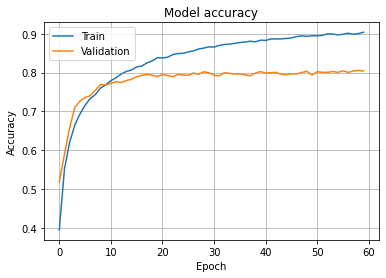

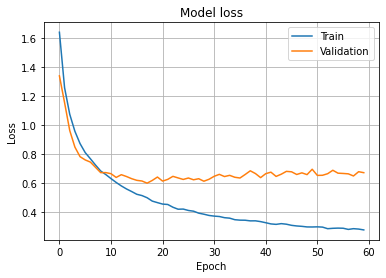

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=60,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5")